# <신용카드 거래 데이터 시각화>

* store_id: 각 파일에서의 상점 고유 번호
* date: 거래일자
* time: 거래시간
* card_id: 카드 번호의 hash 값
* amount: 매출액, 0보다 작은 음수는 거래 취소(환불)
* installments: 할부개월수, 일시불은 빈 문자열
* day_of_week: 요일, 월요일이0, 일요일은6
* holyday: 1이면 공휴일, 0이면 공휴일 아님

### 크게 시간, 식별화 코드, 매출 3가지로 구분

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [10]:
train = pd.read_csv('C:/Users/82102/Desktop/data04/train.csv')
train

store_id        date      time     card_id  amount  installments  \
0               0  2016-12-14  18:05:31  d297bba73f       5           NaN   
1               0  2016-12-14  18:05:54  d297bba73f      -5           NaN   
2               0  2016-12-19  12:42:31  0880849c05     144           NaN   
3               0  2016-12-19  12:48:08  8b4f9e0e95      66           NaN   
4               0  2016-12-19  13:31:08  7ad237eed0      24           NaN   
...           ...         ...       ...         ...     ...           ...   
3362791      1799  2018-07-19  17:58:31  e254bf70d9     600           NaN   
3362792      1799  2018-07-19  18:54:34  8f41c89891     275           NaN   
3362793      1799  2018-07-22  14:46:57  aeb64fe1fb     350           NaN   
3362794      1799  2018-07-25  18:09:13  57932602d6     300           NaN   
3362795      1799  2018-07-30  10:58:53  42d354807a     325           NaN   

         days_of_week  holyday  
0                   2        0  
1                   2        0  
2                   0        0  
3                   0        0  
4                   0        0  
...               ...      ...  
3362791             3        0  
3362792             3        0  
3362793             6        0  
3362794             2        0  
3362795             0        0  

[3362796 rows x 8 columns]

In [11]:
print(train.shape)

(3362796, 8)


In [12]:
train.describe()

store_id        amount  installments  days_of_week       holyday
count  3.362796e+06  3.362796e+06  16860.000000  3.362796e+06  3.362796e+06
mean   8.323770e+02  1.459623e+02      3.459490  3.066320e+00  4.431283e-02
std    5.468544e+02  6.017306e+02      2.382382  1.976153e+00  2.057892e-01
min    0.000000e+00 -2.500000e+05      2.000000  0.000000e+00  0.000000e+00
25%    3.350000e+02  3.200000e+01      3.000000  1.000000e+00  0.000000e+00
50%    8.220000e+02  7.500000e+01      3.000000  3.000000e+00  0.000000e+00
75%    1.342000e+03  1.500000e+02      3.000000  5.000000e+00  0.000000e+00
max    1.799000e+03  2.500000e+05     36.000000  6.000000e+00  1.000000e+00

## 이상치 제거

In [19]:
train["temp"]=1

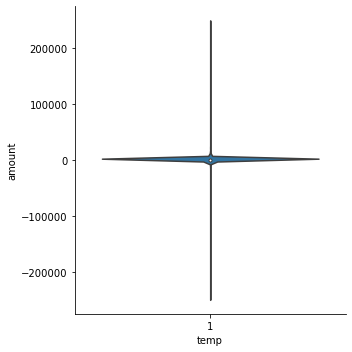

In [20]:
sns.catplot(data = train, x="temp", y="amount", kind="violin")

In [24]:
percentage_100 = np.percentile(train["amount"], 100)
print(percentage_100)

250000.0


### amount는 -250000 ~ 250000 범위를 가지며 분포 확인이 어려움

In [22]:
percentage_99 = np.percentile(train["amount"], 99)
print(percentage_99)

1335.0


In [23]:
percentage_98 = np.percentile(train["amount"], 98)
print(percentage_98)

800.0


#### amount가 갖는 영역에 비해 99와 98퍼센트 값은 훨씬 적은 값을 가짐.
#### 1000에서 약 98.5%의 데이터가 존재하므로 1000보다 큰 값, -1000보다 작은 값을 이상치로 제거

In [33]:
train = train.loc[(train["amount"]>=-1000) & (train["amount"] <=1000)]

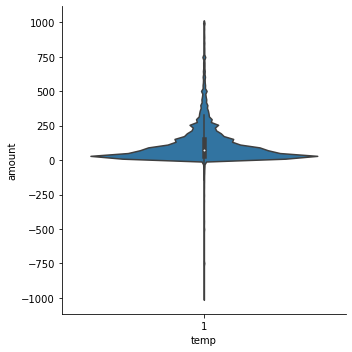

In [34]:
sns.catplot(data=train, x="temp", y="amount", kind="violin")

### 더 고르게 분포함

## 결측치 제거

In [13]:
train.isnull().sum()

store_id              0
date                  0
time                  0
card_id               0
amount                0
installments    3345936
days_of_week          0
holyday               0
dtype: int64

### installments의 결측치를 1로 대체한다. (일시불)

In [15]:
train['installments']= train['installments'].fillna(1)

In [16]:
train.head()

store_id        date      time     card_id  amount  installments  \
0         0  2016-12-14  18:05:31  d297bba73f       5           1.0   
1         0  2016-12-14  18:05:54  d297bba73f      -5           1.0   
2         0  2016-12-19  12:42:31  0880849c05     144           1.0   
3         0  2016-12-19  12:48:08  8b4f9e0e95      66           1.0   
4         0  2016-12-19  13:31:08  7ad237eed0      24           1.0   

   days_of_week  holyday  
0             2        0  
1             2        0  
2             0        0  
3             0        0  
4             0        0

In [25]:
train.isnull().sum()

store_id        0
date            0
time            0
card_id         0
amount          0
installments    0
days_of_week    0
holyday         0
total           0
temp            0
dtype: int64

### Total컬럼 만들기

In [17]:
train["total"] =train["amount"] * train["installments"]

In [35]:
train.head()

store_id        date      time     card_id  amount  installments  \
0         0  2016-12-14  18:05:31  d297bba73f       5           1.0   
1         0  2016-12-14  18:05:54  d297bba73f      -5           1.0   
2         0  2016-12-19  12:42:31  0880849c05     144           1.0   
3         0  2016-12-19  12:48:08  8b4f9e0e95      66           1.0   
4         0  2016-12-19  13:31:08  7ad237eed0      24           1.0   

   days_of_week  holyday  total  temp  
0             2        0    5.0     1  
1             2        0   -5.0     1  
2             0        0  144.0     1  
3             0        0   66.0     1  
4             0        0   24.0     1

In [36]:
del train["temp"]

### 상관관계 분석 시각화

In [38]:
plt.figure(figsize = (10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

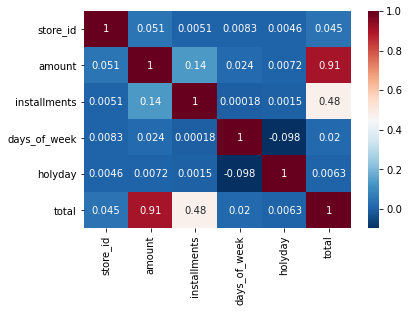

In [41]:
sns.heatmap(train[train.columns].corr(), cmap="RdBu_r", annot=True)

## 1. store_id- count

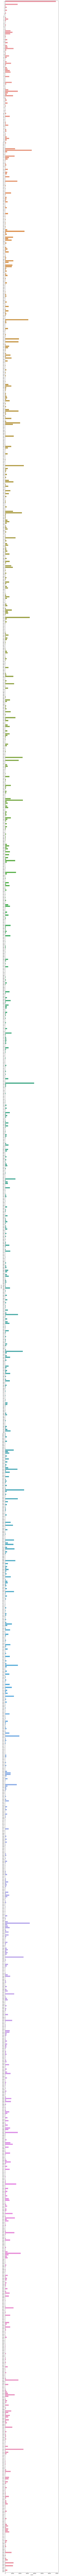

In [42]:
figure, ax=plt.subplots()
figure.set_size_inches(10,500)
sns.countplot(data=train, y="store_id")

In [43]:
count_list=[]
for i in range(1799):
    train_temp =train.loc[train["store_id"] == i]
    values = {"count": train_temp.shape[0]}
    count_list.append(values)

In [45]:
count_list = pd.DataFrame.from_dict(count_list)
count_list = count_list.sort_values(by="count", ascending= False)
count_list.index.name = "store_id"

### 거래 기록 많은 상위 10개 가게

In [46]:
count_list.head(10)

count
store_id       
0         68715
753       39217
105       35999
1342      33325
428       33281
221       31404
161       26108
1038      25694
323       25219
1366      24940

### 거래 기록 적은 상위 10개 가게

In [47]:
count_list.tail(10)

count
store_id       
1079          0
1577          0
385           0
1539          0
847           0
557           0
994           0
1231          0
1705          0
1655          0

#### 거래 기록이 이루어지지 않음

In [49]:
count_list_0 = count_list.loc[count_list["count"]==0]
count_list_0.shape[0]

55

#### 거래 기록이 이루어지지 않은 가게는 총 55개

## 2. store_id - total

In [52]:
total_list = []
for i in range(1799):
    train_temp = train.loc[train["store_id"] == i]
    values = {"total": train_temp["total"].sum()}
    total_list.append(values)

In [53]:
total_list = pd.DataFrame.from_dict(total_list)
total_list = total_list.sort_values(by="total", ascending= False)
total_list.index.name = "store_id"

### 매출액 상위 10개 가게의 store_id

In [54]:
total_list.head(10)

total
store_id           
753       9353275.0
1342      7392831.0
0         5318111.0
161       4624716.0
1076      3781650.0
1024      2962918.0
104       2960875.0
1209      2863403.0
597       2787632.0
105       2563178.0

### 매출액 하위 10개 가게의 store_id